# Análise dos Resultados

### Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from PIL import Image
import numpy as np
import tensorflow as tf
import time
import random
from tensorflow import keras
import json

### Comparação de Métricas

In [2]:
metrics = {
    "Real": {
        "Acurácia": [0.91, 0.87],
        "Precisão": [0.92, 0.87],
        "Revocação": [0.91, 0.88],
        "F1-Score": [0.91, 0.87],
        "AUC-ROC": [0.97, 0.95],
    },
    "Fake": { 
        "Acurácia": [0.91, 0.87],
        "Precisão": [0.91, 0.88],
        "Revocação": [0.92, 0.87],
        "F1-Score": [0.91, 0.87],
        "AUC-ROC": [0.97, 0.95],
    },
}

tabela = PrettyTable()
tabela.field_names = ["Modelo", "Categoria", "Precisão", "Revocação", "F1-Score","Acurácia","AUC-ROC"]

tabela.add_row(["MobileNetV2", "Real", 
                f"{metrics['Real']['Precisão'][0]:.2f}", 
                f"{metrics['Real']['Revocação'][0]:.2f}", 
                f"{metrics['Real']['F1-Score'][0]:.2f}",
                f"{metrics['Real']['Acurácia'][0]:.2f}",
                f"{metrics['Real']['AUC-ROC'][0]:.2f}"],)

tabela.add_row(["MobileNetV2", "Fake", 
                f"{metrics['Fake']['Precisão'][0]:.2f}", 
                f"{metrics['Fake']['Revocação'][0]:.2f}", 
                f"{metrics['Fake']['F1-Score'][0]:.2f}",
                f"{metrics['Fake']['Acurácia'][0]:.2f}",
                f"{metrics['Fake']['AUC-ROC'][0]:.2f}"])

tabela.add_row(["ResNet50", "Real", 
                f"{metrics['Real']['Precisão'][1]:.2f}", 
                f"{metrics['Real']['Revocação'][1]:.2f}", 
                f"{metrics['Real']['F1-Score'][1]:.2f}",
                f"{metrics['Real']['Acurácia'][1]:.2f}", 
                f"{metrics['Real']['AUC-ROC'][1]:.2f}"])

tabela.add_row(["ResNet50", "Fake", 
                f"{metrics['Fake']['Precisão'][1]:.2f}", 
                f"{metrics['Fake']['Revocação'][1]:.2f}", 
                f"{metrics['Fake']['F1-Score'][1]:.2f}",
                f"{metrics['Fake']['Acurácia'][1]:.2f}",
                f"{metrics['Fake']['AUC-ROC'][1]:.2f}"])

print("Comparação de Desempenho:")
print(tabela)

Comparação de Desempenho:
+-------------+-----------+----------+-----------+----------+----------+---------+
|    Modelo   | Categoria | Precisão | Revocação | F1-Score | Acurácia | AUC-ROC |
+-------------+-----------+----------+-----------+----------+----------+---------+
| MobileNetV2 |    Real   |   0.92   |    0.91   |   0.91   |   0.91   |   0.97  |
| MobileNetV2 |    Fake   |   0.91   |    0.92   |   0.91   |   0.91   |   0.97  |
|   ResNet50  |    Real   |   0.87   |    0.88   |   0.87   |   0.87   |   0.95  |
|   ResNet50  |    Fake   |   0.88   |    0.87   |   0.87   |   0.87   |   0.95  |
+-------------+-----------+----------+-----------+----------+----------+---------+


In [3]:
with open('../history_mobile.json','r') as file:
    data_mobile = json.load(file)
with open('../history_resnet.json','r') as file:
    data_resnet = json.load(file)

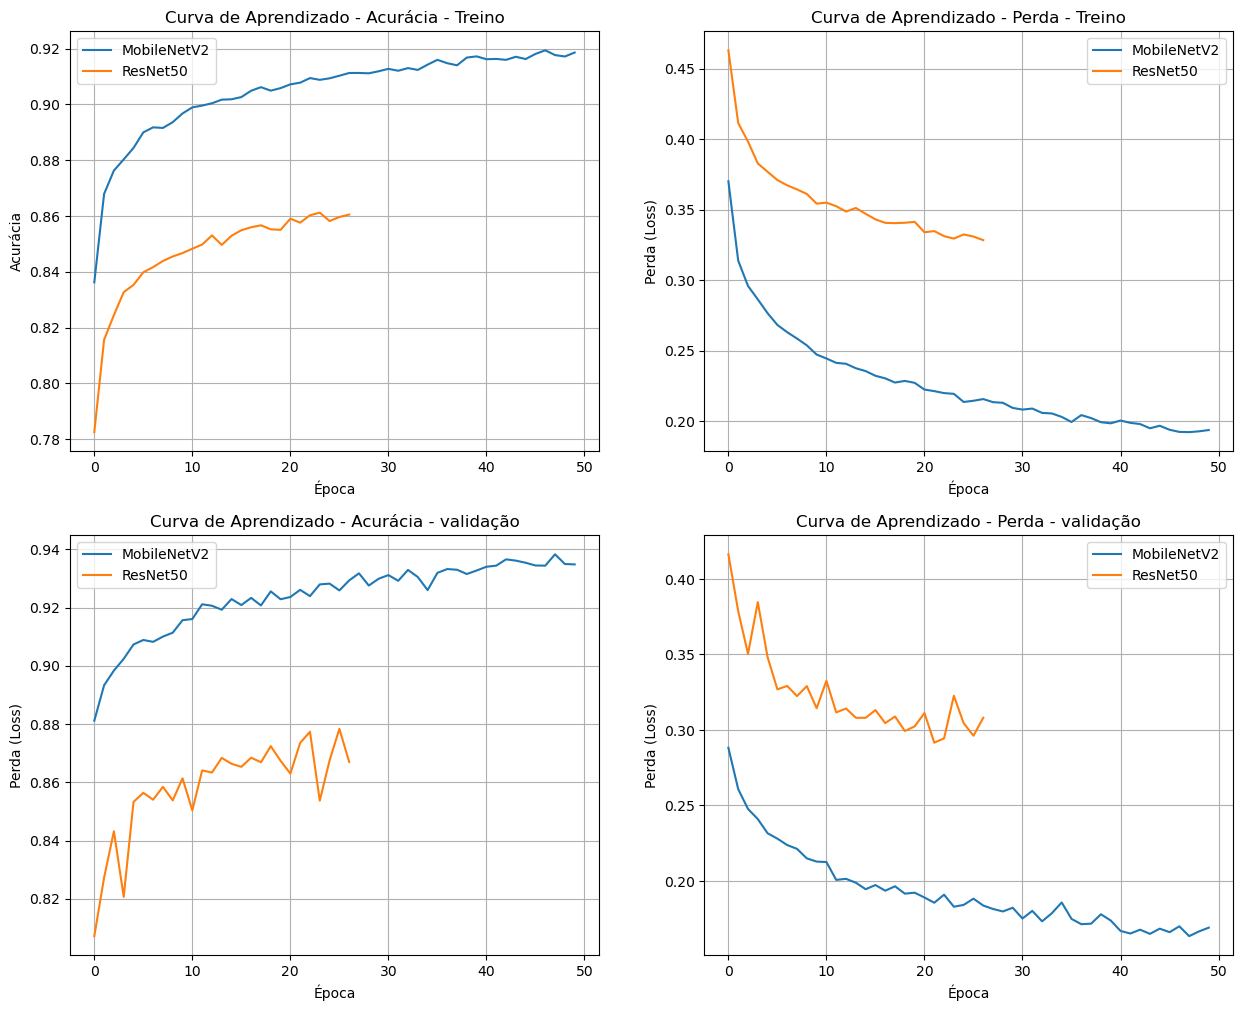

In [4]:
plt.figure(figsize=(15,12))
# Acurácia
plt.subplot(2, 2, 1)
plt.plot(data_mobile['accuracy'], label='MobileNetV2')
plt.plot(data_resnet['accuracy'], label='ResNet50')
plt.title("Curva de Aprendizado - Acurácia - Treino")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()

# Perda
plt.subplot(2, 2, 2)
plt.plot(data_mobile['loss'], label='MobileNetV2')
plt.plot(data_resnet['loss'], label='ResNet50')
plt.title("Curva de Aprendizado - Perda - Treino")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da acurácia
plt.subplot(2, 2, 3)
plt.plot(data_mobile['val_accuracy'], label='MobileNetV2')
plt.plot(data_resnet['val_accuracy'], label='ResNet50')
plt.title("Curva de Aprendizado - Acurácia - validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da perda
plt.subplot(2, 2, 4)
plt.plot(data_mobile['val_loss'], label='MobileNetV2')
plt.plot(data_resnet['val_loss'], label='ResNet50')
plt.title("Curva de Aprendizado - Perda - validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

plt.show()

### Análise dos Resultados

#### Desempenho geral

A MobileNetV2 superou a ResNet50 em todas as métricas: obteve F1-Score de 0.91 para ambas as classes (real e fake), enquanto a ResNet50 obteve 0.87. A acurácia da MobileNetV2 também foi superior (0.91 contra 0.87), assim como a AUC-ROC (0.97 vs. 0.95). As curvas de aprendizado reforçam esses números: a MobileNetV2 apresenta curvas de loss mais estáveis e sem overfitting pronunciado, com a loss de validação convergindo junto da loss de treino. A ResNet50, por outro lado, demonstra flutuações maiores na validação, sugerindo menor generalização. Além disso, a MobileNetV2 treinou por mais épocas, o que pode ter permitido melhor refinamento dos pesos, dentro do limite imposto pelo early stopping.

#### Diferenças principais entre as arquiteturas

A principal diferença entre as duas arquiteturas é a profundidade e complexidade. A ResNet50 possui mais parâmetros e é mais profunda, já a MobileNetV2 é uma arquitetura leve, o que a torna muito mais eficiente em termos computacionais. Ambas foram usadas com pesos pré-treinados da ImageNet, e o conjunto de validação foi o mesmo, o que garante uma comparação justa dos modelos.

A melhor performance da MobileNetV2 pode ser atribuída à sua leveza e capacidade de generalização em datasets. A ResNet50, com alto número de parâmetros, pode ter sofrido dificuldade para se adaptar ao domínio específico das imagens reais vs. sintéticas. A MobileNetV2, por ser otimizada para eficiência e ser menos propensa ao overfitting em tarefas pequenas, conseguiu extrair representações mais relevantes. A MobileNetV2 apresenta uma vantagem clara no problema proposto: menor tempo de treino, menor consumo de memória e melhor capacidade de generalização

### Desafios e próximos passos

O problema de classificação binária de imagens é desafiador, principalmente porque as imagens falsas podem ser muito convincentes e os sinais distintivos podem ser sutis. Além disso, o CIFAKE contém imagens pequenas, o que limita a quantidade de detalhes disponíveis. Para melhorar os resultados e como próximos passos da pesquisa, seria interessante aplicar data augmentation mais robusta ou explorar modelos diferentes, também menores como a MobileNetV2. Também é válido testar arquiteturas modernas como EfficientNet ou ViT (Vision Transformer), e fazer uma análise mais detalhada sobre o que diferencia uma imagem real de uma imagem falsa.